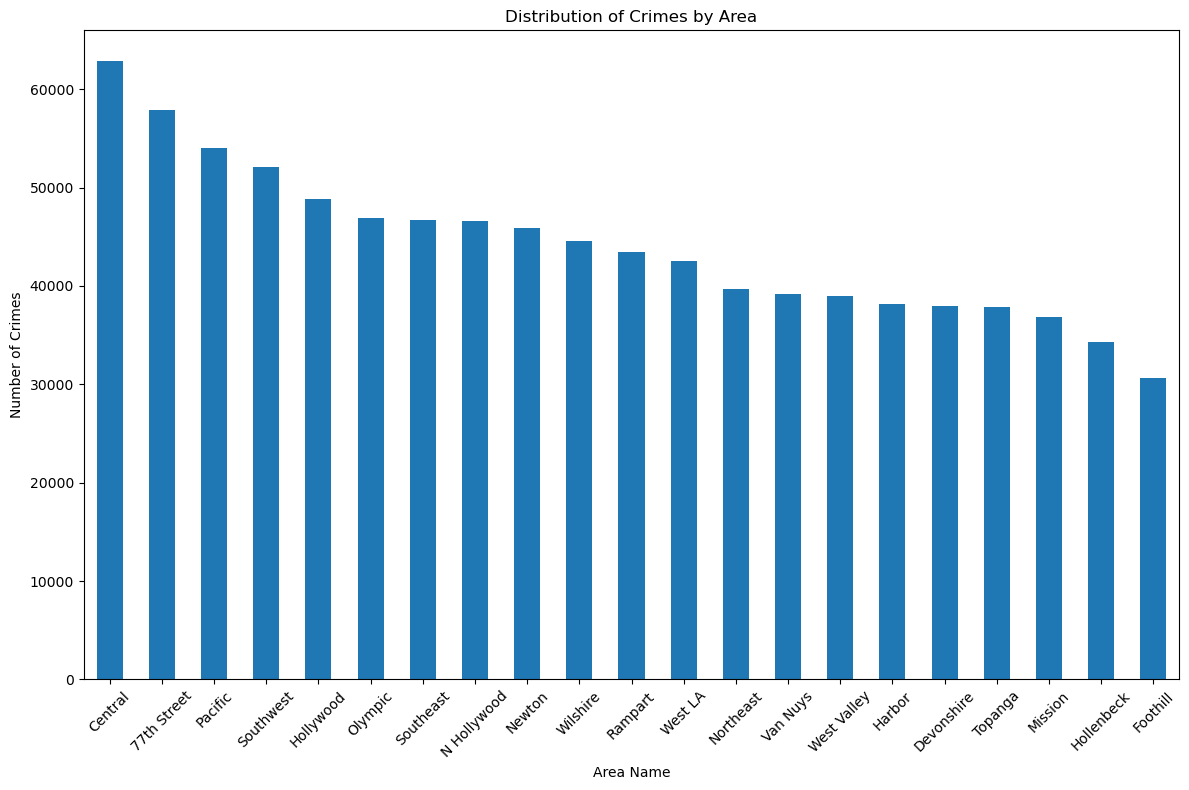

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

crime_count_by_area = data['AREA NAME'].value_counts()
plt.figure(figsize=(12, 8))
crime_count_by_area.plot(kind='bar')
plt.title('Distribution of Crimes by Area')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

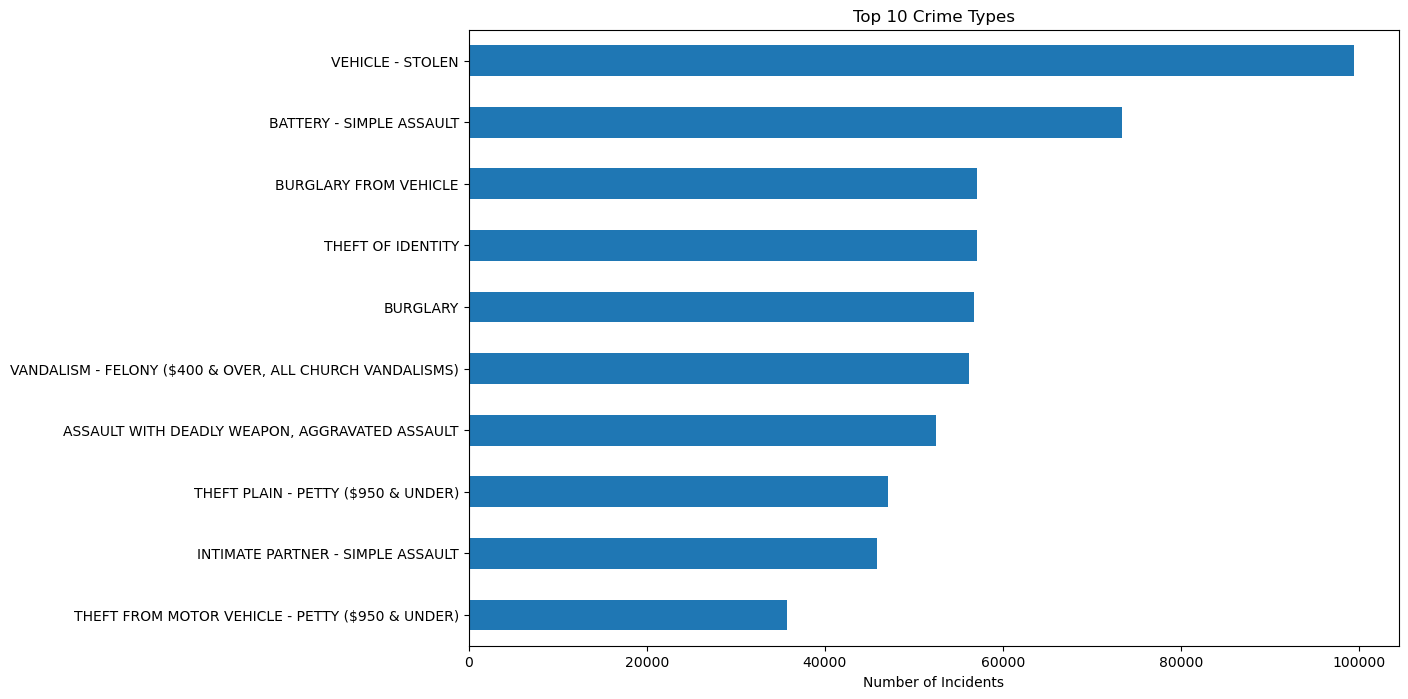

In [8]:
top_crimes = data['Crm Cd Desc'].value_counts().head(10)
plt.figure(figsize=(12, 8))
top_crimes.plot(kind='barh')
plt.title('Top 10 Crime Types')
plt.xlabel('Number of Incidents')
plt.gca().invert_yaxis()  
plt.show()


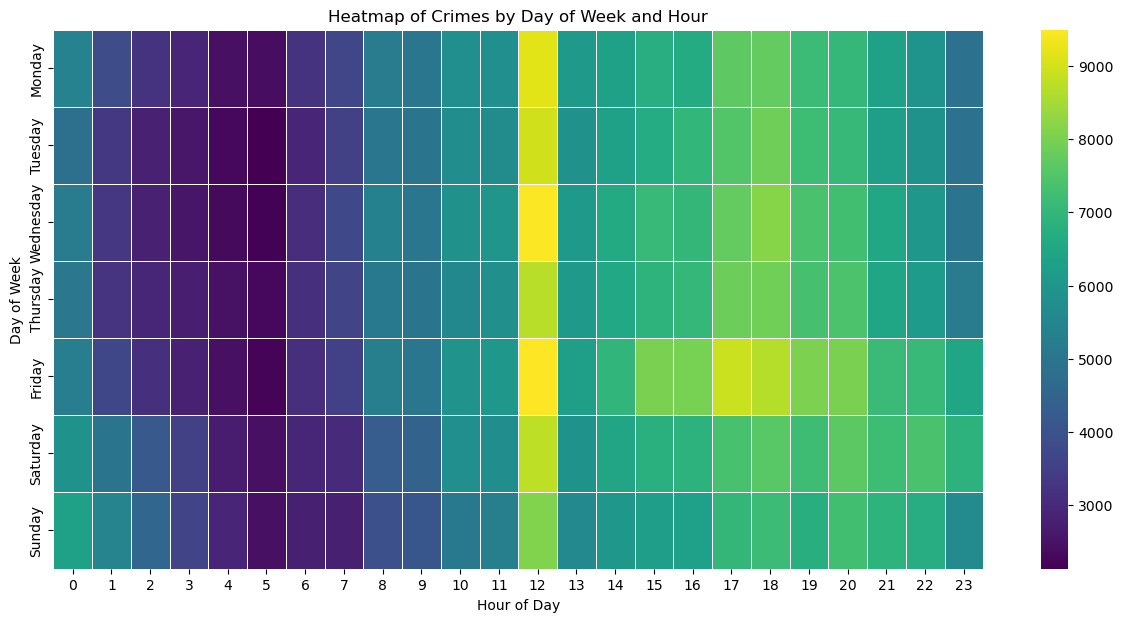

In [10]:
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])

data['Day of Week'] = data['DATE OCC'].dt.day_name()
data['Hour'] = data['TIME OCC'] // 100

pivot_table = data.pivot_table(index='Day of Week', columns='Hour', aggfunc='size', fill_value=0)

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(days_order)

plt.figure(figsize=(15, 7))
sns.heatmap(pivot_table, cmap='viridis', linewidths=.5)
plt.title('Heatmap of Crimes by Day of Week and Hour')
plt.ylabel('Day of Week')
plt.xlabel('Hour of Day')
plt.show()